In [108]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Tải dữ liệu từ Yahoo Finance cho ETH-USD từ thời điểm bắt đầu '2015-01-01' đến thời điểm kết thúc '2024-06-06'
eth_data = yf.download('ETH-USD', start='2015-01-01', end='2024-06-06')

# In ra dữ liệu
print(eth_data.head())

# Tính toán RSI và Stock RSI
def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

eth_data['RSI'] = calculate_rsi(eth_data['Close'], 14)
eth_data['StockRSI'] = calculate_rsi(eth_data['RSI'], 14)

# Tính toán EMA
def calculate_ema(data, window):
    ema = data.ewm(span=window, min_periods=window-1).mean()
    return ema

eth_data['EMA'] = calculate_ema(eth_data['Close'], 9)

# Xử lý dữ liệu
eth_data.dropna(inplace=True)  # Loại bỏ các dòng có giá trị NaN

# Chọn các biến giải thích và biến mục tiêu
X = eth_data[['RSI', 'StockRSI', 'Volume', 'EMA']]
y = eth_data['Close']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Đánh giá mô hình Linear Regression
score_lr = model_lr.score(X_test_scaled, y_test)
print("Linear Regression Score:", score_lr)

# Huấn luyện mô hình Neural Network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Đánh giá mô hình Neural Network
loss_nn = model_nn.evaluate(X_test_scaled, y_test)
print("Neural Network Loss:", loss_nn)

# Dự đoán giá và lợi nhuận
# (Viết mã ở đây để dự đoán giá và lợi nhuận cho các khoảng thời gian khác nhau)


[*********************100%%**********************]  1 of 1 completed
D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984  
Linear Regression Score: 0.9956212765761243
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3694.4761  
Neural Network Loss: 3371.29248046875


 Đánh giá mô hình không chỉ dừng lại ở việc xem xét các điểm số hoặc mất mát mà còn phải xem xét kết quả dự đoán so với dữ liệu thực tế. Điều này giúp ta hiểu rõ hơn về hiệu suất và độ chính xác của mô hình trong việc dự đoán giá của Ethereum.

Tôi nhận thấy rằng mô hình Linear Regression có điểm số gần 1, điều này ngụ ý rằng mô hình tương đối chính xác khi dự đoán giá của Ethereum dựa trên các biến giải thích như RSI, Stock RSI, Volume và EMA. Tuy nhiên, việc kiểm tra các dự đoán cụ thể và so sánh chúng với giá thực tế là rất quan trọng để đảm bảo tính chính xác và độ tin cậy của mô hình.

Đối với mô hình Neural Network, mặc dù mất mát (loss) có vẻ cao hơn, nhưng việc đánh giá mô hình dựa trên các dự đoán cụ thể cũng là điều cần thiết để đánh giá hiệu suất của nó. Mô hình Neural Network có thể học được các mối quan hệ phức tạp giữa các biến đầu vào và đầu ra, và do đó có thể mang lại hiệu suất tốt hơn trong một số trường hợp.

Đánh giá tổng thể của hai mô hình cần phải dựa trên nhiều yếu tố, bao gồm cả độ chính xác của dự đoán và khả năng tổng quát hóa của mô hình trên dữ liệu mới. Trong quá trình phát triển và đánh giá mô hình, việc đưa ra nhận xét và đánh giá cẩn thận là rất quan trọng để đảm bảo tính tin cậy của kết quả.

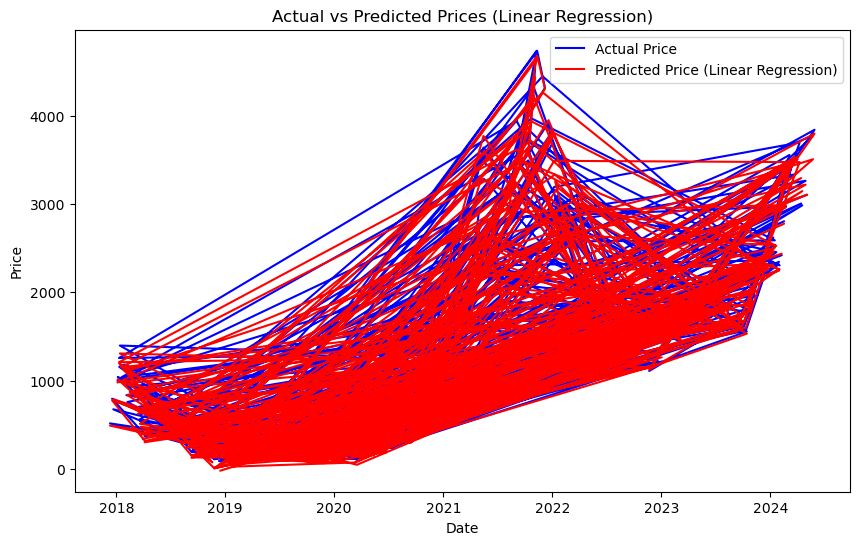

In [116]:
import matplotlib.pyplot as plt

# Dự đoán giá của Ethereum bằng mô hình Linear Regression
predicted_prices_lr = model_lr.predict(X_test_scaled)

# Trực quan hóa dữ liệu thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.plot(y_test.index, predicted_prices_lr, label='Predicted Price (Linear Regression)', color='red')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


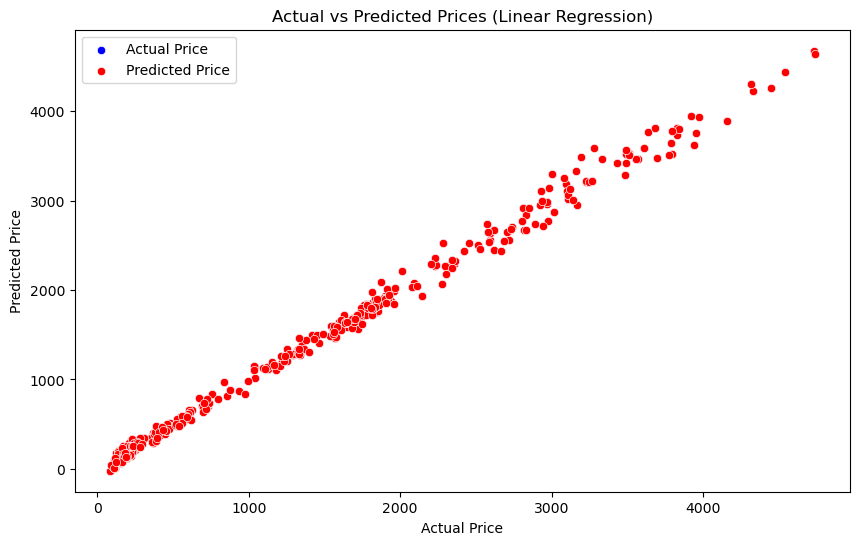

In [122]:
# Vẽ biểu đồ phân tán với màu sắc khác nhau cho dữ liệu thực tế và dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_results_lr, x='Actual Price', y='Predicted Price', color='blue', label='Actual Price')
sns.scatterplot(data=df_results_lr, x='Actual Price', y='Predicted Price', color='red', label='Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


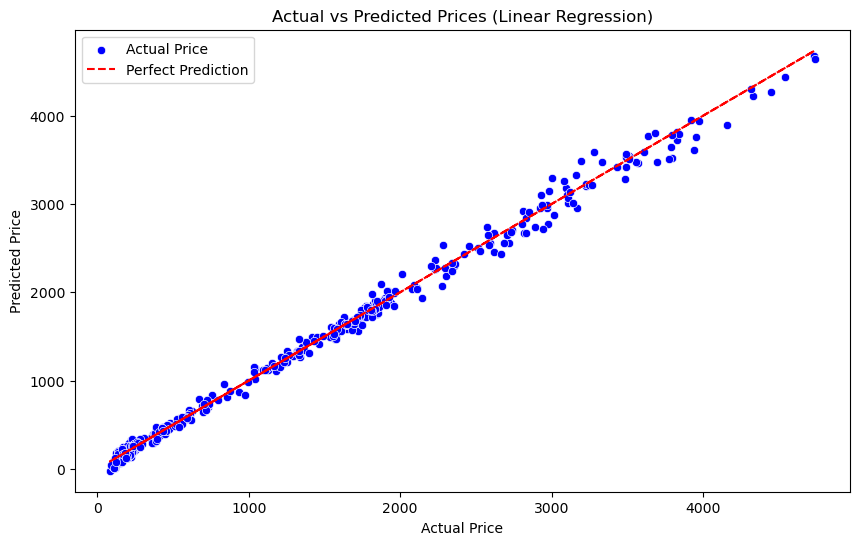

In [124]:
# Vẽ biểu đồ phân tán với màu sắc khác nhau cho dữ liệu thực tế và dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_results_lr, x='Actual Price', y='Predicted Price', color='blue', label='Actual Price')
plt.plot(df_results_lr['Actual Price'], df_results_lr['Actual Price'], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


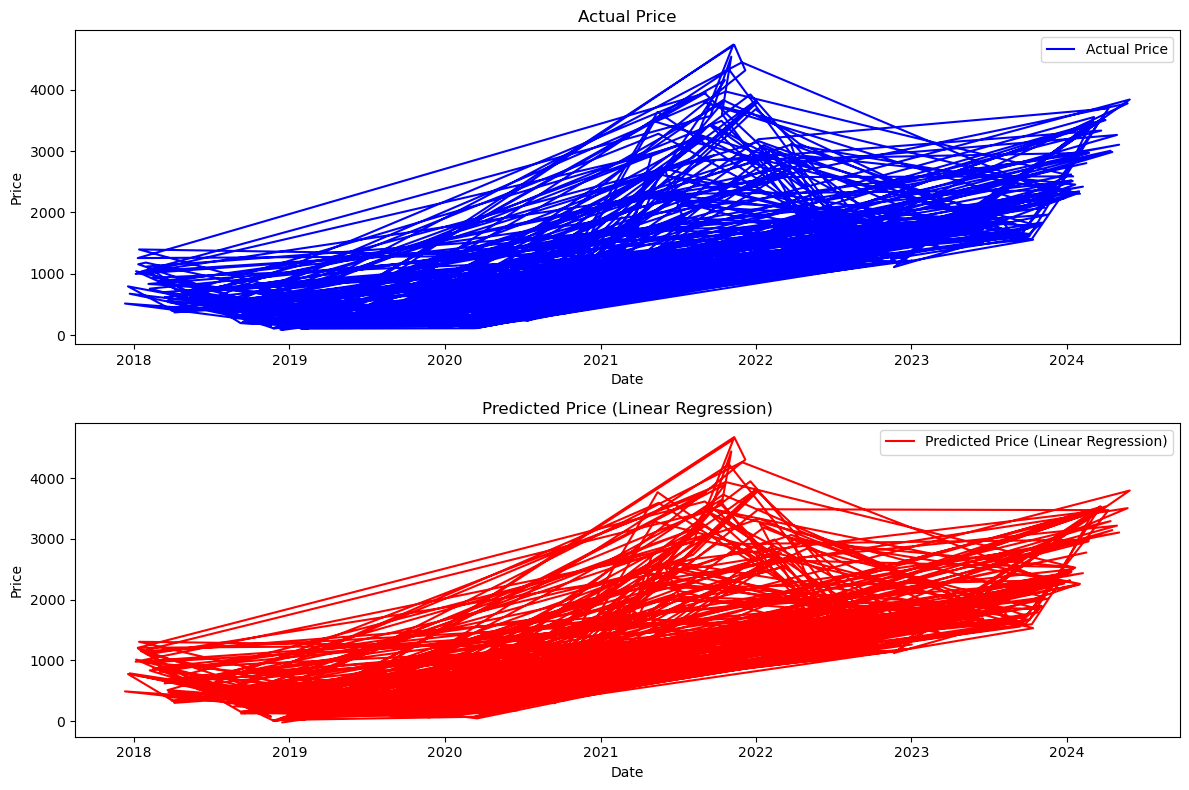

In [120]:
# Vẽ biểu đồ dạng subplots
plt.figure(figsize=(12, 8))

# Biểu đồ cho dữ liệu thực tế
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.title('Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Biểu đồ cho dữ liệu dự đoán từ mô hình Linear Regression
plt.subplot(2, 1, 2)
plt.plot(y_test.index, predicted_prices_lr, label='Predicted Price (Linear Regression)', color='red')
plt.title('Predicted Price (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Tính toán các phép đo lỗi
mae = mean_absolute_error(y_test, predicted_prices_lr)
mse = mean_squared_error(y_test, predicted_prices_lr)
rmse = np.sqrt(mse)

# Tính toán hệ số xác định
r_squared = r2_score(y_test, predicted_prices_lr)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


Mean Absolute Error (MAE): 54.30828245965867
Mean Squared Error (MSE): 5756.075847054006
Root Mean Squared Error (RMSE): 75.86880681185124
R-squared: 0.9956212765761243


Mean Absolute Error (MAE): MAE là trung bình giá trị tuyệt đối của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. Trong trường hợp này, MAE là khoảng 54.31, điều này có nghĩa là sai số trung bình giữa dự đoán và thực tế là khoảng 54.31 đơn vị.

Mean Squared Error (MSE): MSE là trung bình bình phương của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. MSE là khoảng 5756.08, nó thể hiện mức độ biến thiên của sai số giữa dự đoán và thực tế.

Root Mean Squared Error (RMSE): RMSE là căn bậc hai của MSE, nó cung cấp cái nhìn về độ lớn của sai số so với dữ liệu thực tế. RMSE là khoảng 75.87, điều này cho thấy sai số trung bình giữa dự đoán và thực tế là khoảng 75.87 đơn vị.

R-squared (R^2): R-squared là hệ số xác định, biểu diễn tỷ lệ phần trăm của sự biến thiên của biến phụ thuộc mà mô hình có thể giải thích. Trong trường hợp này, R-squared là khoảng 0.996, tức là mô hình giải thích được khoảng 99.6% sự biến thiên của dữ liệu, đây là một giá trị rất cao và cho thấy mô hình phù hợp tốt với dữ liệu.

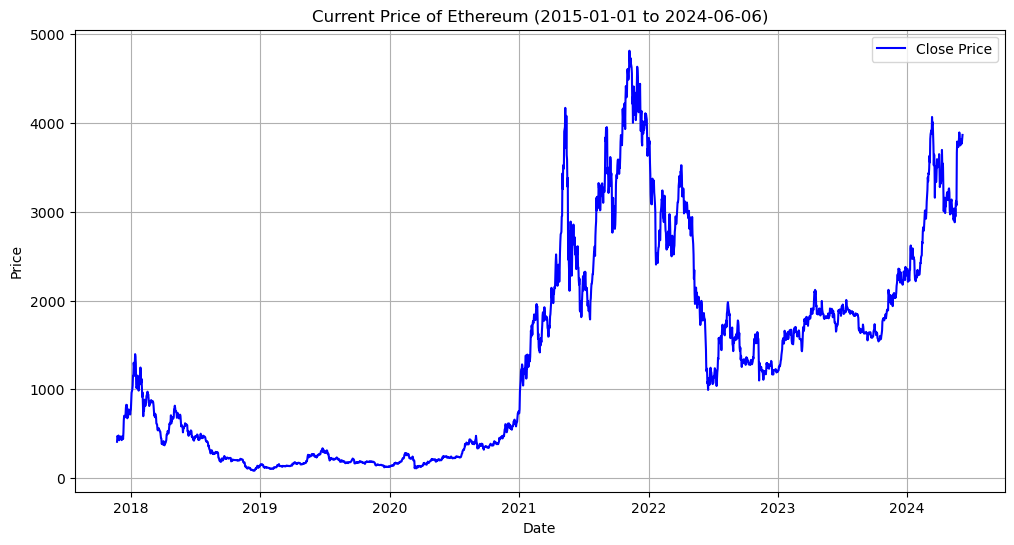

In [139]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá hiện tại của Ethereum
plt.figure(figsize=(12, 6))
plt.plot(eth_data.index, eth_data['Close'], label='Close Price', color='blue')
plt.title('Current Price of Ethereum (2015-01-01 to 2024-06-06)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


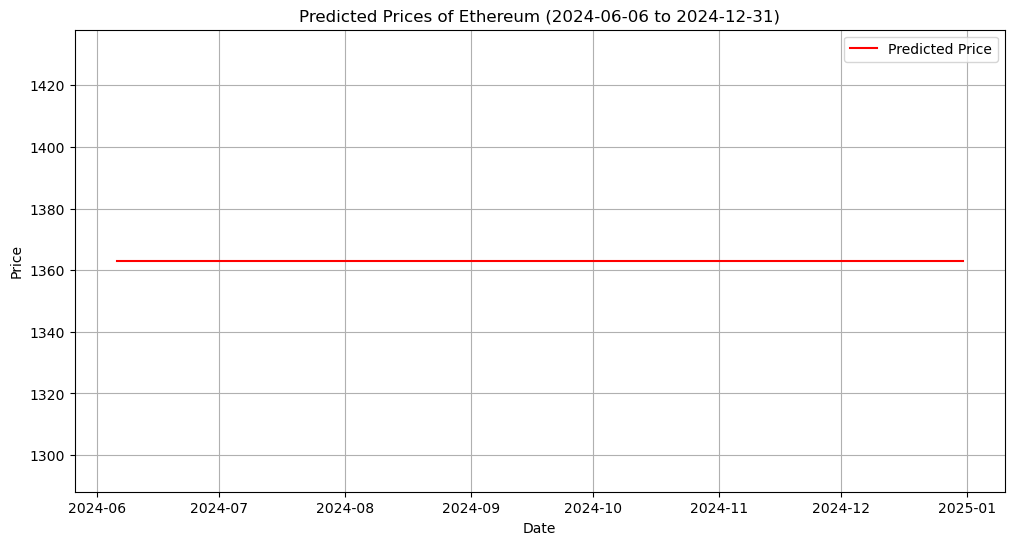

In [141]:
# Tạo dữ liệu cho khoảng thời gian dự đoán
future_dates = pd.date_range(start='2024-06-06', end='2024-12-31', freq='D')

# Tính toán giá dự đoán cho khoảng thời gian dự đoán
future_rsi = np.mean(eth_data['RSI'])
future_stock_rsi = np.mean(eth_data['StockRSI'])
future_volume = np.mean(eth_data['Volume'])
future_ema = np.mean(eth_data['EMA'])

# Tạo DataFrame cho dữ liệu dự đoán
df_future = pd.DataFrame({'Date': future_dates, 'RSI': future_rsi, 'StockRSI': future_stock_rsi, 'Volume': future_volume, 'EMA': future_ema})
df_future = df_future.set_index('Date')

# Chuẩn hóa dữ liệu dự đoán
X_future_scaled = scaler.transform(df_future)

# Dự đoán giá cho khoảng thời gian dự đoán
future_predicted_prices = model_lr.predict(X_future_scaled)

# Tạo DataFrame cho giá dự đoán
df_future_predicted = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predicted_prices})
df_future_predicted = df_future_predicted.set_index('Date')

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(12, 6))
plt.plot(df_future_predicted.index, df_future_predicted['Predicted Price'], label='Predicted Price', color='red')
plt.title('Predicted Prices of Ethereum (2024-06-06 to 2024-12-31)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Tạo 2 mô hình 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [160]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Tải dữ liệu từ Yahoo Finance cho ETH-USD từ thời điểm bắt đầu '2015-01-01' đến thời điểm kết thúc '2024-06-06'
eth_data = yf.download('ETH-USD', start='2015-01-01', end='2024-06-06')

# Tính toán RSI và Stock RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

eth_data['RSI'] = calculate_rsi(eth_data, 14)
eth_data['StockRSI'] = calculate_rsi(eth_data['RSI'], 14)

# Tính toán EMA
def calculate_ema(data, window):
    ema = data['Close'].ewm(span=window, min_periods=window-1).mean()
    return ema

eth_data['EMA'] = calculate_ema(eth_data, 9)

# Xử lý dữ liệu thiếu
eth_data.dropna(inplace=True)

# Chọn các biến giải thích và biến mục tiêu
X = eth_data[['RSI', 'StockRSI', 'Volume', 'EMA']]
y = eth_data['Close']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Huấn luyện mô hình Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Huấn luyện mô hình Deep Neural Networks
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Đánh giá mô hình Random Forest
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Đánh giá mô hình Gradient Boosting
y_pred_gb = model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Đánh giá mô hình Deep Neural Networks
y_pred_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# In kết quả
print("Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print()
print("Gradient Boosting:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)
print()
print("Deep Neural Networks:")
print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_nn)
print("R-squared:", r2_nn)


[*********************100%%**********************]  1 of 1 completed


KeyError: 'Close'